# AI-Driven IoT Concept: Smart Agriculture with soil moisture sensor
Goal: Design a simple simulation and a model to predict soil moisture → irrigation decision or crop yield from sensor readings.

In [43]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [44]:
import pandas as pd

# Load dataset
df = pd.read_csv('soil-moisture.csv')

# View first few rows
df.head()


,Month,Day,avg_pm1,avg_pm2,avg_pm3,avg_am,avg_lum,avg_temp,avg_humd,avg_pres,avg_sm
0,Jul,18,3.548400,5.929200,24.940800,0.0,2208.880000,21.660300,90.785900,92940.33720,7435.450000
1,Jul,19,3.416827,6.403133,116.188916,0.0,3241.160643,23.232932,85.260723,92980.24438,7292.257028
2,Jul,20,3.030642,5.580000,132.736096,0.0,3333.941176,23.238877,83.925134,93012.82439,7696.133690
3,Jul,21,3.091991,5.580000,128.520000,0.0,3523.764706,23.670136,81.513756,93014.88014,7489.737557
4,Jul,22,3.129000,5.580000,128.520000,0.0,3756.722727,23.031273,83.486409,93053.78677,7407.200000


In [45]:
# check for missing values
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     224 non-null    object 
 1   Day       224 non-null    int64  
 2   avg_pm1   224 non-null    float64
 3   avg_pm2   224 non-null    float64
 4   avg_pm3   224 non-null    float64
 5   avg_am    224 non-null    float64
 6   avg_lum   224 non-null    float64
 7   avg_temp  224 non-null    float64
 8   avg_humd  224 non-null    float64
 9   avg_pres  224 non-null    float64
 10  avg_sm    224 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 19.4+ KB


Month       0
Day         0
avg_pm1     0
avg_pm2     0
avg_pm3     0
avg_am      0
avg_lum     0
avg_temp    0
avg_humd    0
avg_pres    0
avg_sm      0
dtype: int64

              Day     avg_pm1     avg_pm2     avg_pm3      avg_am  \
count  224.000000  224.000000  224.000000  224.000000  224.000000   
mean    15.875000    1.365278    2.134474   49.114740    1.014181   
std      9.113755    0.514288    1.032322   22.774731    0.981695   
min      1.000000    0.866522    1.164902   24.940800    0.000000   
25%      7.750000    1.030000    1.424875   33.520000    0.000000   
50%     16.000000    1.173074    1.759600   40.588400    1.047947   
75%     24.000000    1.504217    2.405481   55.226049    1.742388   
max     31.000000    3.548400    6.403133  132.736096    4.347826   

           avg_lum    avg_temp    avg_humd      avg_pres       avg_sm  
count   224.000000  224.000000  224.000000    224.000000   224.000000  
mean   2722.153112   22.539300   73.015649  93234.844591  3257.613631  
std     666.311082    1.534203   19.283496    255.194892  3105.998698  
min     789.708333   15.612500   29.041698  92472.839310   326.652174  
25%    2126.516601

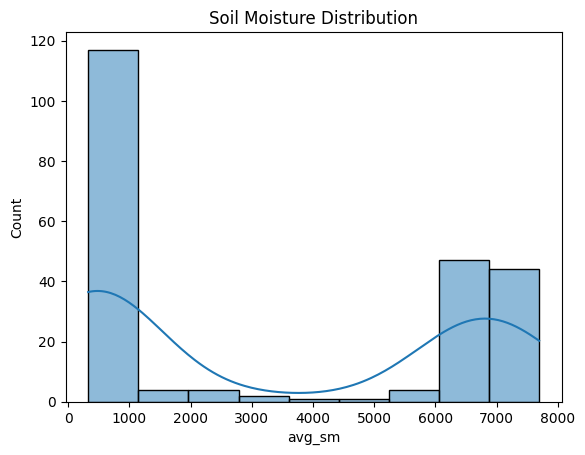

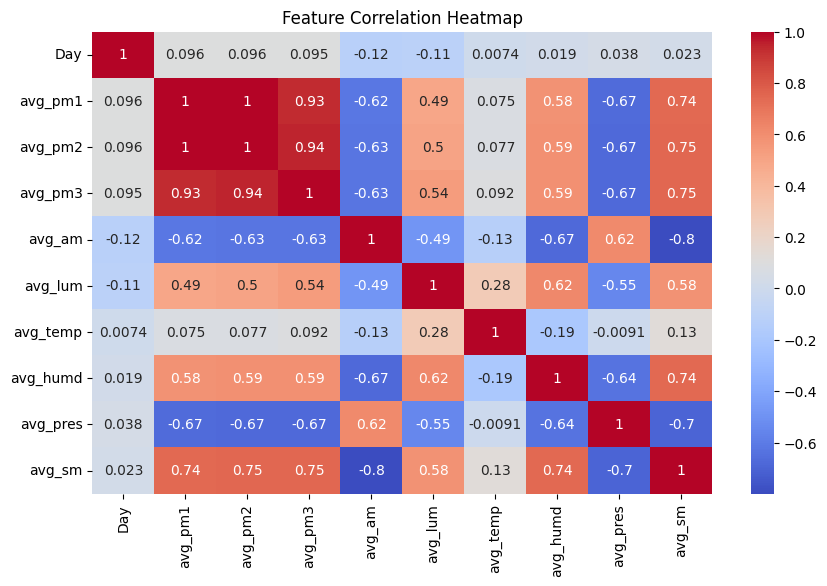

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Visualize soil moisture distribution
sns.histplot(df['avg_sm'], kde=True)
plt.title("Soil Moisture Distribution")
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [47]:
# Features: temperature, humidity
X = df[['avg_temp', 'avg_humd']]

# Target: soil moisture
y = df['avg_sm']


In [48]:
# model training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (179, 2)
Test set size: (45, 2)


In [49]:
# train: Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# Predict
y_pred = model.predict(X_test)

In [51]:
# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 1287.7923731663268
MSE: 2729283.732325984
R2: 0.6793967100834841


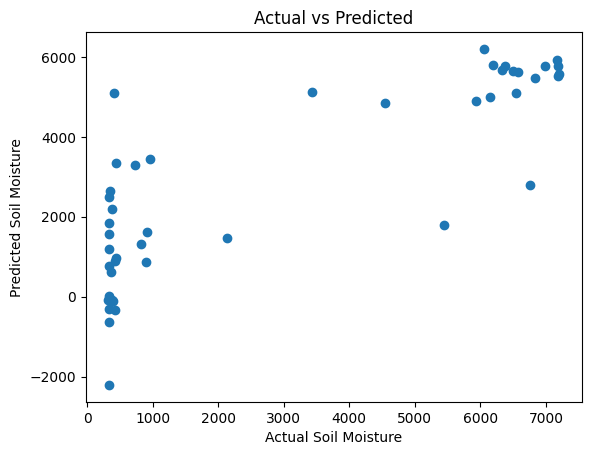

In [52]:
# Visualize Predictions vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('Actual vs Predicted')
plt.show()
